In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import signal

In [178]:
np.random.seed(42)

Part (a)
--

First let's estimate theta, standard error, and confidence intervals, using the standard bootstrapping methods.

In [179]:
n = 100

In [180]:
mu = 5

In [181]:
sigma = 1

In [182]:
X = np.random.normal(loc=mu, scale=sigma, size=n)

In [183]:
theta = np.exp(mu)

In [184]:
X_bar = np.mean(X)

In [185]:
theta_hat = np.exp(X_bar)

In [186]:
B = int(1e5)

In [187]:
T_boot = np.empty(B)

In [188]:
for i in range(B):
    X_star = np.random.choice(X, size=n, replace=True)
    T_boot[i] = np.exp(np.mean(X_star))

In [189]:
se = np.std(T_boot)

In [190]:
low_quant = np.quantile(T_boot, 0.025)

In [191]:
up_quant = np.quantile(T_boot, 0.975)

In [192]:
print('Actual theta: {:.4f}'.format(theta))
print('Estimated theta: {:.4f}'.format(theta_hat))
print('Estimated standard error: {:.4f}'.format(se))
print('Normal inverval: ({:.4f},{:.4f})'.format(theta_hat-2*se, theta_hat+2*se))
print('Pivotal interval: ({:.4f},{:.4f})'.format(2*theta_hat-up_quant, 2*theta_hat-low_quant))
print('Percentile interval: ({:.4f},{:.4f})'.format(low_quant, up_quant))

Actual theta: 148.4132
Estimated theta: 133.7742
Estimated standard error: 12.1581
Normal inverval: (109.4580,158.0905)
Pivotal interval: (108.0149,155.7411)
Percentile interval: (111.8074,159.5336)


Part (b)
--

Here is a histogram of the 

Text(0.5, 1.0, 'Histogram of $e^{\\overline{X}}$ sampled from empirical distribution')

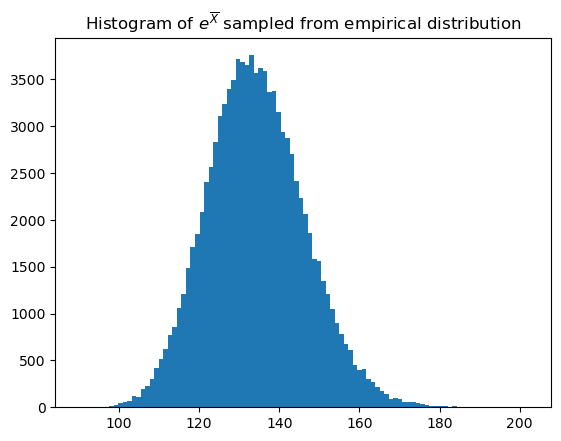

In [193]:
plt.hist(T_boot, bins=100)
plt.title(r'Histogram of $e^{\overline{X}}$ sampled from empirical distribution')

Now we estimate the actual sampling distribution of $e^{\overline X}$ by sampling from a normal distribution. The PDF in this case could be computed analytically by using the fact that $\overline X$ is normal (as a mean of independent normal random variables) and using the standard methods for computing the PDF of its transformation $e^{\overline X}$.

In [194]:
sampled = np.empty(B)

In [195]:
for i in range(B):
    Y = np.mean(np.random.normal(loc=mu, scale=sigma, size=n))
    sampled[i] = np.exp(Y)

Text(0.5, 1.0, 'Histogram of $e^{\\overline{X}}$ sampled from a normal distribution')

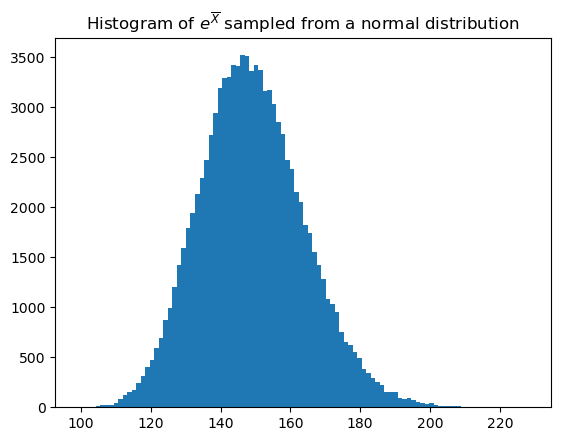

In [196]:
plt.hist(sampled, bins=100)
plt.title(r'Histogram of $e^{\overline{X}}$ sampled from a normal distribution')

Text(0.5, 1.0, 'Histogram of $e^{\\overline{X}}$ sampled from both methods')

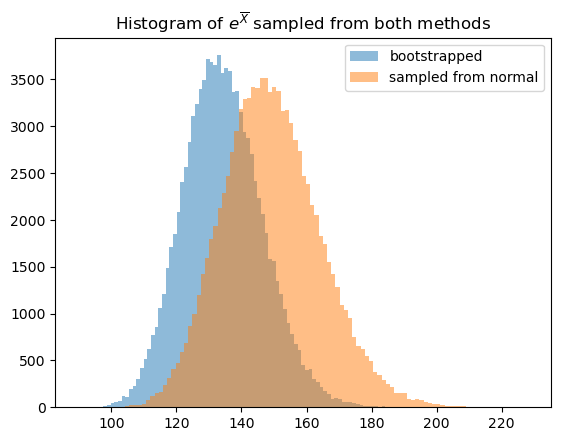

In [198]:
plt.hist(T_boot, bins=100, alpha=0.5, label='bootstrapped')
plt.hist(sampled, bins=100, alpha=0.5, label='sampled from normal')
plt.legend()
plt.title(r'Histogram of $e^{\overline{X}}$ sampled from both methods')

As you can see, the distributions are close but clearly not equal.